In [1]:
!pip install keras
!pip install pillow

In [2]:
from google.colab import files

uploaded = files.upload()

Saving FV.h5 to FV.h5


In [3]:
from keras.models import load_model

model = load_model('FV.h5')

labels = {0: 'apple', 1: 'banana', 2: 'beetroot', 3: 'bell pepper', 4: 'cabbage', 5: 'capsicum', 6: 'carrot',
          7: 'cauliflower', 8: 'chilli pepper', 9: 'corn', 10: 'cucumber', 11: 'eggplant', 12: 'garlic', 13: 'ginger',
          14: 'grapes', 15: 'jalepeno', 16: 'kiwi', 17: 'lemon', 18: 'lettuce',
          19: 'mango', 20: 'onion', 21: 'orange', 22: 'paprika', 23: 'pear', 24: 'peas', 25: 'pineapple',
          26: 'pomegranate', 27: 'potato', 28: 'raddish', 29: 'soy beans', 30: 'spinach', 31: 'sweetcorn',
          32: 'sweetpotato', 33: 'tomato', 34: 'turnip', 35: 'watermelon'}

fruits = ['Apple', 'Banana', 'Bello Pepper', 'Chilli Pepper', 'Grapes', 'Jalepeno', 'Kiwi', 'Lemon', 'Mango', 'Orange',
          'Paprika', 'Pear', 'Pineapple', 'Pomegranate', 'Watermelon']
vegetables = ['Beetroot', 'Cabbage', 'Capsicum', 'Carrot', 'Cauliflower', 'Corn', 'Cucumber', 'Eggplant', 'Ginger',
              'Lettuce', 'Onion', 'Peas', 'Potato', 'Raddish', 'Soy Beans', 'Spinach', 'Sweetcorn', 'Sweetpotato',
              'Tomato', 'Turnip']


In [4]:
from keras.preprocessing.image import load_img, img_to_array
import numpy as np
predictions=[]
def processed_img(img_path):
    img = load_img(img_path, target_size=(224, 224, 3))
    img = img_to_array(img)
    img = img / 255
    img = np.expand_dims(img, [0])
    prediction = model.predict(img)
    y_class = prediction.argmax(axis=-1)
    y = int(y_class[0])
    result = labels[y]
    return result.capitalize()

Saving Image_3.jpg to Image_3 (2).jpg


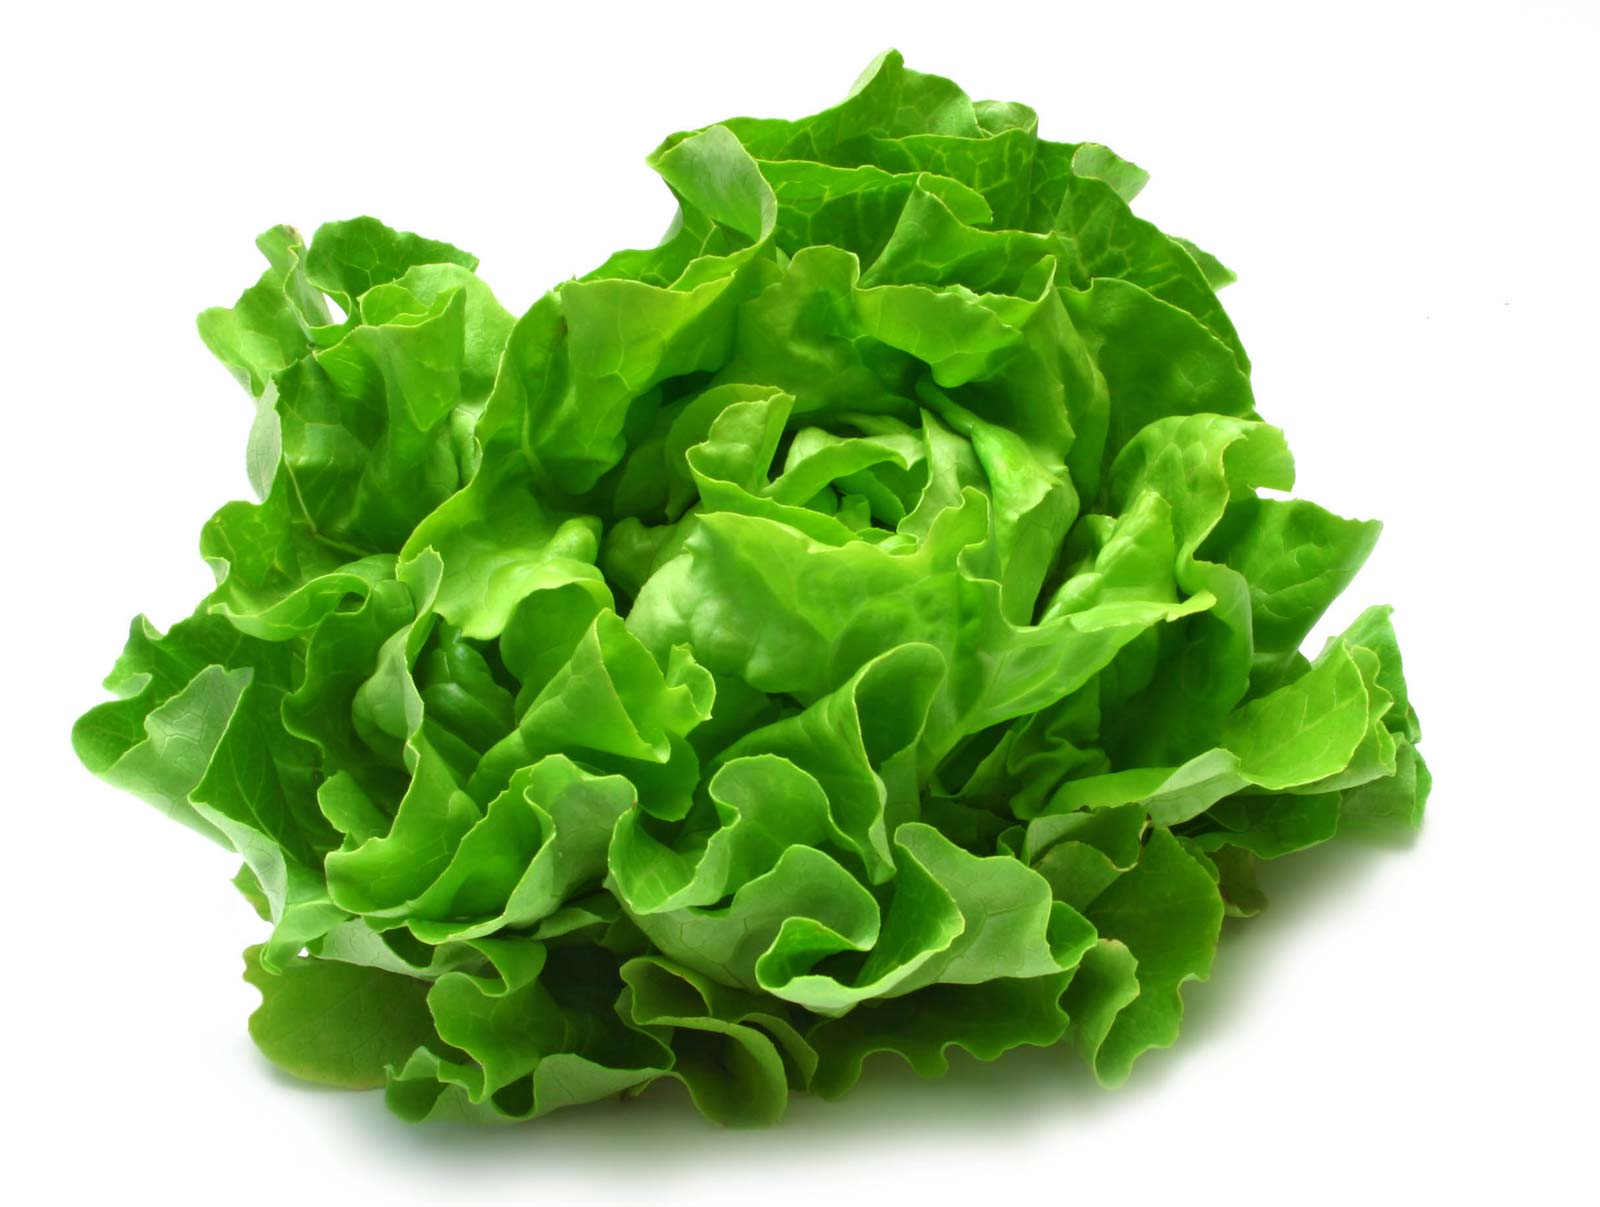

1/1 [==============================] - 0s 82ms/step
Predicted: Lettuce


In [23]:
from IPython.display import display, Image

uploaded = files.upload()

for img_path in uploaded.keys():
    display(Image(img_path, width=250, height=250))  # Display the image
    result = processed_img(img_path)
    predictions.append(result)
    print("Predicted:", result)


In [24]:
print("All predictions:", predictions)

All predictions: ['Tomato', 'Spinach', 'Raddish', 'Potato', 'Tomato', 'Spinach', 'Raddish', 'Lettuce']


In [25]:
!pip install openai==0.28
import openai
import os
os.environ['OPENAI_API_KEY']= 'API_KEY'
openai.api_key = os.getenv('OPENAI_API_KEY')

In [26]:
def create_dish_prompt(predictions):
  prompt = f"Create a detailed recipe based on only the following ingredients: {', '.join(predictions)} \n"\
          +f"Additionally, assign a title starting with 'Recipe Title: ' to this recipe"
  return prompt

In [27]:
recipe = create_dish_prompt(predictions)

In [28]:
response = openai.Completion.create(engine='gpt-3.5-turbo-instruct',
                                    prompt = recipe,
                                    max_tokens=512,
                                    temperature=0.7)
result_text= response['choices'][0]['text']
print(result_text)



Recipe Title: Roasted Vegetable Salad with Tomato Vinaigrette

Ingredients:
- 2 large tomatoes
- 2 cups spinach
- 1 cup radishes, sliced
- 2 medium potatoes, diced
- 1 head of lettuce, chopped
- Salt and pepper, to taste

Tomato Vinaigrette:
- 1 large tomato, diced
- 1/4 cup olive oil
- 2 tablespoons red wine vinegar
- 1 teaspoon honey
- 1 garlic clove, minced
- Salt and pepper, to taste

Instructions:

1. Preheat your oven to 400°F (200°C).

2. Wash and dry all vegetables. Cut the tomatoes into wedges and place them on a baking sheet lined with parchment paper.

3. In a bowl, toss the diced potatoes with a drizzle of olive oil, salt, and pepper. Place them on the same baking sheet as the tomatoes.

4. Roast the tomatoes and potatoes in the oven for 20-25 minutes, or until they are tender and slightly charred.

5. While the vegetables are roasting, prepare the tomato vinaigrette. In a blender, add the diced tomato, olive oil, red wine vinegar, honey, minced garlic, salt, and pepper. 